# Demo Pos Hujan 
Demo penggunaan ```prepkit```, Modul `prepkit` berisikan perintah untuk melakukan persiapan data, dari data mentah (raw) sampai siap analisis. Data mentah dalam modul ini dalam berbentuk excel, untuk data mentah berjeniskan _pdf_ belum dapat dilakukan dengan mudah. Excel yang dapat dibaca juga harus sudah diketahui pola excelnya, excel yang tidak konsisten tidak disarankan langsung digunakan, lebih baik membuat format yang sudah disiapkan agar memudahkan dokumentasi dan pengelolaan lebih lanjut.

Saat ini penggunaan _script_ ini tidak langsung pakai, setidaknya pengguna harus memiliki pemahaman mengenai bagaimana beroperasi di python, mengenal struktur `dataframe` pada `pandas`. 

Untuk data mentah, disarankan disimpan kembali dalam bentuk `.csv` dan bukan dalam `.xls`. Hal ini akan memudahkan dalam pembacaan (untuk `.xls/xlsx` perlu library yang harus diinstall lagi (`xlwt` dan `xlrw`) )

----


Notebook ini akan mendemonstrasikan penggunaan hidrokit dalam kepentingan persiapan analisis hidrologi.

__Catatan__: data `../testdata/` tidak tersedia dalam github terkait saya tidak tahu protokol terkait informasi curah hujan ini. 

## Import Library

Melakukan import library yang akan digunakan:
- `numpy` : library utama dalam penggunaan pandas
- `pandas` : library untuk pengelolaan data
- `matplotlib.pyplot` : library utama dalam penggunaan plot
- `seaborn` : library tambahan untuk plotting
- `pathlib` : built-in library untuk navigasi sistem
- `prepkit` : module untuk persiapan pengelolaan data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
import prepkit, viewkit
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2
%aimport prepkit, viewkit

In [3]:
def viewp(df):
    return viewkit.in_pivot(df, col=df.columns[0])

## Menentukan dokumen

Dokumen dapat berupa _single file_ atau dalam bentuk _folder_. Test data yang digunakan adalah data pos hujan yang saya peroleh dari deri, formatnya saya sebut `'phderi'` untuk singkatan dari `'pos hujan-deri'`. `format='phderi'` merupakan nilai default untuk setiap proses. 

Kode dibawah ini mendemokan bagaimana memperoleh tabel hujan dalam excel tanpa perlu membuka file tersebut (karena buka excel itu lama kalau komputernya pas-pasan.).

`prepkit.get_rawdf(dokumen)`, fungsi melakukan pengambilan data mentah (raw) dalam bentuk dataframe (df) pandas.

In [4]:
dokumen = '../testdata/xls/fmderi/PHTANJUNGBARU/2016 HUJAN TANJUNG BARU.xls'
rawph = prepkit.get_rawdf(dokumen)
rawph = rawph.reset_index().drop('index', axis=1)
rawph.columns = [i for i in range(1,13)]
rawph

,1,2,3,4,5,6,7,8,9,10,11,12
0,-,70.3,19.3,-,17.3,-,-,48,-,-,80,45.5
1,30,21.5,0.8,0.07,10.6,106.5,-,1.8,-,-,0.2,0.8
2,-,9,5.2,-,0.4,-,-,-,-,-,6.5,58.3
3,-,21.9,-,-,-,-,-,-,-,-,-,40
4,5.2,-,-,15,19.8,-,-,-,-,-,39.5,8.7
5,-,51.6,-,8.5,16.2,-,-,-,-,-,6.3,-
6,4.3,-,-,-,25.5,10,31.5,8.2,-,-,5,25
7,-,-,31.9,-,-,-,-,-,2,-,36,3
8,9.5,16.8,26.4,19.8,30.2,1.2,-,-,-,-,63.2,31.8
9,-,75.3,-,-,-,-,-,-,-,-,89.4,48.5


 Format pengambilan data ini mengacu pada `'phderi'` (untuk singkatan `'pos duga-deri'`) jika tidak dinyatakaan secara spesifik. Untuk melakukan pengambilan spesifik, bisa menggunakaan argumen `format=nama_format`.

In [5]:
dokumenpd = '../testdata/xls/fmderi/PDAPALAKBERUNG/2016 PALAKBENGKERUNG.xls'
rawxlpd = prepkit.get_rawdf(dokumenpd, format='pdderi')
rawxlpd = rawxlpd.reset_index().drop('index', axis=1)
rawxlpd

,1,2,3,4,5,6,7,8,9,10,11,12
0,0.44,0.4,0.43,1.16,0.74,0.63,0.64,0.55,0.64,0.92,0.79,0.81
1,0.45,0.17,0.46,0.72,0.57,0.59,0.59,0.59,1,0.86,0.77,0.8
2,0.56,0.111,0.3,0.68,0.58,0.59,0.57,0.6,0.84,0.87,0.79,1.11
3,0.28,0.111,0.27,0.65,0.63,0.79,0.54,0.51,0.85,0.83,1.06,1.13
4,0.2,0.9,0.38,0.77,0.66,0.66,0.53,0.52,1.07,1.1,0.85,1.01
5,0.19,0.11,0.3,1.06,1.1,0.59,0.55,0.48,0.83,0.86,0.87,0.94
6,0.222,0.36,0.24,0.99,0.77,0.57,0.54,0.43,1.09,1.16,1.27,0.93
7,0.4,0.55,0.22,0.84,0.75,0.95,0.54,0.48,0.88,0.86,1.49,0.84
8,0.45,0.41,0.86,0.8,0.65,0.67,0.53,0.51,0.74,0.75,1.45,0.81
9,0.48,0.75,1.05,0.92,0.83,0.59,0.81,0.56,0.7,0.75,0.9,0.87


## Ubah dalam bentuk kolom

Tabel yang kita peroleh biasanya hanya cocok untuk laporan dan bukan untuk penggunaan analisis, sehingga tabel tersebut harus diubah dalam bentuk kolom dengan indexnya berupa tipe seri-waktu. 

Dalam `prepkit` sudah disiapkan fungsi `tf_rawdf()` untuk mengubah tabel tersebut dalam bentuk kolom tunggal. 
Fungsi `tf_rawdf` memiliki 2 argumen posisi, dan 1 opsional yaitu `dataframe` mentah yang diperoleh dari `get_rawdf`, `year` yang menunjukkan tahun datanya, `name` untuk nama stasiun. Berikut demonya:

In [6]:
dokumen = pathlib.Path(dokumen) # Mengubah menjadi object pathlib
tahun = int(dokumen.stem.split()[0])
nama = ''.join(dokumen.stem.split()[-2:])
phdf = prepkit.tf_rawdf(rawph, year=tahun, name=nama)
phdf.infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2016-01-01 to 2016-12-31
Data columns (total 1 columns):
TANJUNGBARU    365 non-null object
dtypes: object(1)
memory usage: 5.7+ KB


In [7]:
phdf

,TANJUNGBARU
date,
2016-01-01,-
2016-01-02,30
2016-01-03,-
2016-01-04,-
2016-01-05,5.2
2016-01-06,-
2016-01-07,4.3
2016-01-08,-
2016-01-09,9.5


Karena `phdf` merupakan dalam bentuk `dataframe` maka manipulasi `pandas` dapat dilakukan:

- `phdf['20161001':'20161231']` : mengambil data dari bulan Oktober sampai akhir Desember. (Disarankan menggunakan `.loc` atau `.iloc`)
- `phdf.describe()` : memunculkan informasi statistik 
- `phdf[phdf == '-'] = 100` : mengubah data yang memenuhi kondisi `== '-'` ke nilai `100`
- `phdf['TANJUNGBARU'] = pd.to_numeric(phdf['TANJUNGBARU'])` : mengubah ke tipe data numerik

Penggunaan `viewkit` akan dibahas lebih lanjut, untuk sementara `viewkit.in_pivot()` mengubah `dataframe` kolom tunggal menjadi bentuk tabel yang biasanya ada di laporan.

In [14]:
phdf.describe()

,TANJUNGBARU
count,366.000000
mean,12.140246
std,26.038050
min,0.000000
25%,0.000000
50%,0.000000
75%,14.650000
max,219.000000


In [17]:
ph10_12 = phdf['20161001':'20161231']
viewkit.in_pivot(ph10_12, col='TANJUNGBARU').head(10)

month,10,11,12
day,,,
1,0.0,80.0,45.5
2,0.0,0.2,0.8
3,0.0,6.5,58.3
4,0.0,0.0,40.0
5,0.0,39.5,8.7
6,0.0,6.3,0.0
7,0.0,5.0,25.0
8,0.0,36.0,3.0
9,0.0,63.2,31.8


In [9]:
print(phdf.isna().sum()) # Cek nilai NA yang tidak ada
viewp(phdf)[9:13] # Terdapat nilai NA di tanggal 11 desember

TANJUNGBARU    1
dtype: int64


month,1,2,3,4,5,6,7,8,9,10,11,12
day,,,,,,,,,,,,
10,-,75.3,-,-,-,-,-,-,-,-,89.4,48.5
11,-,-,48,62.5,167.4,-,9.3,15,-,-,81,NaN
12,-,39,-,-,59,-,-,2.3,3.5,-,19.5,53
13,-,-,92.5,-,-,-,-,110.8,-,-,23,41.8


In [10]:
phdf = phdf.fillna(method='ffill') # isi nilai na dengan metode 'ffill'
phdf[phdf == '-'] = 0.
phdf = phdf.infer_objects()
viewp(phdf).iloc[9:13,:]

month,1,2,3,4,5,6,7,8,9,10,11,12
day,,,,,,,,,,,,
10,0.0,75.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.4,48.5
11,0.0,0.0,48.0,62.5,167.4,0.0,9.3,15.0,0.0,0.0,81.0,48.5
12,0.0,39.0,0.0,0.0,59.0,0.0,0.0,2.3,3.5,0.0,19.5,53.0
13,0.0,0.0,92.5,0.0,0.0,0.0,0.0,110.8,0.0,0.0,23.0,41.8


In [11]:
viewp(phdf).head()

month,1,2,3,4,5,6,7,8,9,10,11,12
day,,,,,,,,,,,,
1,0.0,70.3,19.3,0.00,17.3,0.0,0.0,48.0,0.0,0.0,80.0,45.5
2,30.0,21.5,0.8,0.07,10.6,106.5,0.0,1.8,0.0,0.0,0.2,0.8
3,0.0,9.0,5.2,0.00,0.4,0.0,0.0,0.0,0.0,0.0,6.5,58.3
4,0.0,21.9,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0
5,5.2,0.0,0.0,15.00,19.8,0.0,0.0,0.0,0.0,0.0,39.5,8.7


## Plotting

Plotting dengan periode seluruh yang ada di `dataframe`

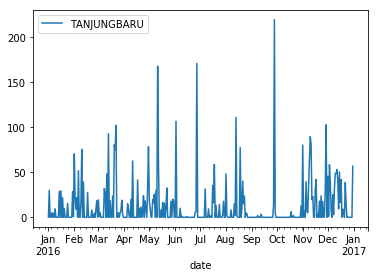

In [12]:
phdf.plot();

Plotting dengan periode tertentu

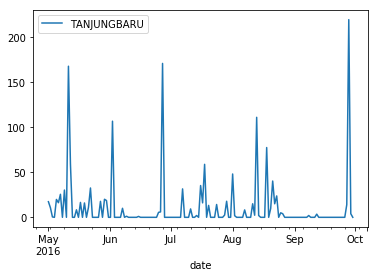

In [13]:
phdf['20160501':'20161001'][:-1].plot();

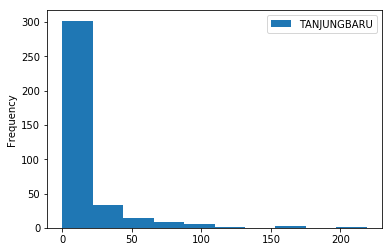

In [20]:
phdf.plot.hist(bins=10)